# Load data

In [3]:
data_dir = '.';
load(sprintf('%s/data_simulation_11.mat',data_dir))

In [4]:
data_0 = permute(data_0, [3 2 1]);
data_1 = permute(data_1, [3 2 1]);

In [5]:
size(data_0), size(data_1)


ans =

        1000          25          50


ans =

        1000          25          50



In [6]:
num_trial = size(data_0, 1);
num_time = size(data_0, 3);

In [7]:
data = struct( ...
    'trialId', num2cell(1:num_trial), ...
    'T', num2cell(zeros(1,num_trial) + num_time), ...
    'y', cellfun(@(c) squeeze(c), num2cell(cat(2, data_0, data_1), [2 3])','UniformOutput',false) ...
)


data = 

  1×1000 struct array with fields:

    trialId
    T
    y



# Load external package

In [1]:
cd '~/hydra/_external/DLAG/'

In [2]:
run("startup.m")

## Optional arguments

In [8]:
% Let's explicitly define all of the optional arguments, for 
% the sake of demonstration:
runIdx = 4;               % Results will be saved in baseDir/mat_results/runXXX/,  
                          % where XXX is runIdx. Use a new runIdx for each dataset.
baseDir = '.';            % Base directory where results will be saved
overwriteExisting = true; % Control whether existing results files are overwritten
saveData = false;         % Set to true to save train and test data (not recommended)
method = 'dlag';          % For now this is the only option, but that may change in the near future
binWidth = 1;            % Sample period / spike count bin width, in units of time (e.g., ms)
numFolds = 0;             % Number of cross-validation folds (0 means no cross-validation)
xDims_across = 3;         % This number of across-group latents matches the synthetic ground truth
xDims_within = {2, 2};    % These numbers match the within-group latents in the synthetic ground truth
yDims = [25 25];          % Number of observed features (neurons) in each group (area)
rGroups = [1 2];          % For performance evaluation, we can regress group 2's activity with group 1
startTau = 2*binWidth;    % Initial timescale, in the same units of time as binWidth
segLength = 50;           % Largest trial segment length, in no. of time points
init_method = 'static';   % Initialize DLAG with fitted pCCA parameters
learnDelays = true;       % Set to false if you want to fix delays at their initial value
maxIters = 5e5;           % Limit the number of EM iterations (not recommended for final fitting stage)
freqLL = 10;              % Check for data log-likelihood convergence every freqLL EM iterations
freqParam = 100;          % Store intermediate delay and timescale estimates every freqParam EM iterations
minVarFrac = 0.01;        % Private noise variances will not be allowed to go below this value
verbose = true;           % Toggle printed progress updates
randomSeed = 0;           % Seed the random number generator, for reproducibility

## Fitting DLAG

In [10]:
fit_dlag(runIdx, data, ...
         'baseDir', baseDir, ...
         'method', method, ...
         'binWidth', binWidth, ...
         'numFolds', numFolds, ...
         'xDims_across', xDims_across, ...
         'xDims_within', xDims_within, ...
         'yDims', yDims, ...
         'rGroups', rGroups,...
         'startTau', startTau, ...
         'segLength', segLength, ...
         'init_method', init_method, ...
         'learnDelays', learnDelays, ...
         'maxIters', maxIters, ...
         'freqLL', freqLL, ...
         'freqParam', freqParam, ...
         'minVarFrac', minVarFrac, ...
         'parallelize', false, ... % Only relevant for cross-validation
         'verbose', verbose, ...
         'randomSeed', randomSeed, ...
         'overwriteExisting', overwriteExisting, ...
         'saveData', saveData);


---------------------------------------
Making directory ./mat_results/run004...

===== Training on all data =====
Number of training trials: 1000
Number of test trials: 0
Across-group latent dimensionality: 3
Within-group latent dimensionalities: 2  2
Observation dimensionality: 50

Initializing DLAG using pCCA...
LL converged after 3470 EM iterations. 2219449.468419

Fitting DLAG model...
EM iteration 8785 of 500000        lik 2625069.057945       lik 2625069.194440       lik 2625069.330779       lik 2625069.466962       lik 2625069.602990       lik 2625069.738861       lik 2625069.874577       lik 2625070.010138       lik 2625070.145543       lik 2625070.280793       lik 2625070.415886       lik 2625070.550824       lik 2625070.685608       lik 2625070.820237       lik 2625070.954710       lik 2625071.089030       lik 2625071.223193       lik 2625071.357202       lik 2625071.491058       lik 2625071.624760       lik 2625071.758306       lik 2625071.891697       lik 2625072.024936  

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 12179 of 500000        lik 2625116.398580       lik 2625116.481862       lik 2625116.565065       lik 2625116.648193       lik 2625116.731244       lik 2625116.814218       lik 2625116.897118       lik 2625116.979940       lik 2625117.062687       lik 2625117.145358       lik 2625117.227953       lik 2625117.310472       lik 2625117.392917       lik 2625117.475287       lik 2625117.557582       lik 2625117.639803       lik 2625117.721949       lik 2625117.804021       lik 2625117.886017       lik 2625117.967941       lik 2625118.049791       lik 2625118.131568       lik 2625118.213272       lik 2625118.294903       lik 2625118.376459       lik 2625118.457943       lik 2625118.539355       lik 2625118.620694       lik 2625118.701959       lik 2625118.783154       lik 2625118.864278       lik 2625118.945329       lik 2625119.026308       lik 2625119.107216       lik 2625119.188052       lik 2625119.268818       lik 2625119.349511       lik 2625119.430136       lik 2625119.51

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 21015 of 500000        lik 2625168.187743       lik 2625168.239540       lik 2625168.291312       lik 2625168.343060       lik 2625168.394784       lik 2625168.446483       lik 2625168.498159       lik 2625168.549810       lik 2625168.601437       lik 2625168.653040       lik 2625168.704620       lik 2625168.756175       lik 2625168.807706       lik 2625168.859214       lik 2625168.910697       lik 2625168.962156       lik 2625169.013592       lik 2625169.065004       lik 2625169.116392       lik 2625169.167756       lik 2625169.219096       lik 2625169.270413       lik 2625169.321706       lik 2625169.372975       lik 2625169.424221       lik 2625169.475443       lik 2625169.526641       lik 2625169.577816       lik 2625169.628968       lik 2625169.680095       lik 2625169.731200       lik 2625169.782281       lik 2625169.833338       lik 2625169.884372       lik 2625169.935383       lik 2625169.986370       lik 2625170.037334       lik 2625170.088275       lik 2625170.13

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 25415 of 500000        lik 2625191.276408       lik 2625191.319717       lik 2625191.363015       lik 2625191.406302       lik 2625191.449576       lik 2625191.492839       lik 2625191.536090       lik 2625191.579329       lik 2625191.622557       lik 2625191.665773       lik 2625191.708978       lik 2625191.752170       lik 2625191.795351       lik 2625191.838520       lik 2625191.881678       lik 2625191.924824       lik 2625191.967959       lik 2625192.011082       lik 2625192.054193       lik 2625192.097293       lik 2625192.140381       lik 2625192.183458       lik 2625192.226523       lik 2625192.269577       lik 2625192.312619       lik 2625192.355650       lik 2625192.398669       lik 2625192.441676       lik 2625192.484672       lik 2625192.527657       lik 2625192.570630       lik 2625192.613592       lik 2625192.656542       lik 2625192.699481       lik 2625192.742409       lik 2625192.785325       lik 2625192.828230       lik 2625192.871123       lik 2625192.91

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 48688 of 500000        lik 2625268.696423       lik 2625268.718422       lik 2625268.740415       lik 2625268.762401       lik 2625268.784380       lik 2625268.806352       lik 2625268.828318       lik 2625268.850276       lik 2625268.872229       lik 2625268.894174       lik 2625268.916112       lik 2625268.938044       lik 2625268.959969       lik 2625268.981887       lik 2625269.003799       lik 2625269.025704       lik 2625269.047602       lik 2625269.069493       lik 2625269.091378       lik 2625269.113255       lik 2625269.135126       lik 2625269.156991       lik 2625269.178848       lik 2625269.200699       lik 2625269.222544       lik 2625269.244381       lik 2625269.266212       lik 2625269.288036       lik 2625269.309853       lik 2625269.331664       lik 2625269.353467       lik 2625269.375265       lik 2625269.397055       lik 2625269.418839       lik 2625269.440616       lik 2625269.462386       lik 2625269.484150       lik 2625269.505907       lik 2625269.52

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 51844 of 500000        lik 2625274.152868       lik 2625274.173179       lik 2625274.193484       lik 2625274.213782       lik 2625274.234075       lik 2625274.254361       lik 2625274.274640       lik 2625274.294914       lik 2625274.315181       lik 2625274.335441       lik 2625274.355696       lik 2625274.375944       lik 2625274.396186       lik 2625274.416421       lik 2625274.436651       lik 2625274.456873       lik 2625274.477090       lik 2625274.497300       lik 2625274.517504       lik 2625274.537702       lik 2625274.557894       lik 2625274.578079       lik 2625274.598258       lik 2625274.618430       lik 2625274.638597       lik 2625274.658757       lik 2625274.678910       lik 2625274.699058       lik 2625274.719199       lik 2625274.739334       lik 2625274.759463       lik 2625274.779585       lik 2625274.799701       lik 2625274.819811       lik 2625274.839915       lik 2625274.860012       lik 2625274.880103       lik 2625274.900188       lik 2625274.92

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 56100 of 500000        lik 2625282.254907       lik 2625282.272678       lik 2625282.290443       lik 2625282.308203       lik 2625282.325957       lik 2625282.343706       lik 2625282.361449       lik 2625282.379186       lik 2625282.396918       lik 2625282.414644       lik 2625282.432365       lik 2625282.450080       lik 2625282.467789       lik 2625282.485493       lik 2625282.503191       lik 2625282.520884       lik 2625282.538571       lik 2625282.556253       lik 2625282.573929       lik 2625282.591599       lik 2625282.609264       lik 2625282.626923       lik 2625282.644576       lik 2625282.662224       lik 2625282.679867       lik 2625282.697504       lik 2625282.715135       lik 2625282.732761       lik 2625282.750381       lik 2625282.767996       lik 2625282.785605       lik 2625282.803208       lik 2625282.820806       lik 2625282.838399       lik 2625282.855985       lik 2625282.873567       lik 2625282.891142       lik 2625282.908712       lik 2625282.92

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 57125 of 500000        lik 2625285.044901       lik 2625285.061789       lik 2625285.078673       lik 2625285.095551       lik 2625285.112423       lik 2625285.129291       lik 2625285.146153       lik 2625285.163009       lik 2625285.179861       lik 2625285.196707       lik 2625285.213547       lik 2625285.230383       lik 2625285.247212       lik 2625285.264037       lik 2625285.280856       lik 2625285.297670       lik 2625285.314479       lik 2625285.331282       lik 2625285.348080       lik 2625285.364873       lik 2625285.381660       lik 2625285.398442       lik 2625285.415219       lik 2625285.431990       lik 2625285.448756       lik 2625285.465517       lik 2625285.482273       lik 2625285.499023       lik 2625285.515767       lik 2625285.532507       lik 2625285.549241       lik 2625285.565970       lik 2625285.582694       lik 2625285.599412       lik 2625285.616125       lik 2625285.632833       lik 2625285.649535       lik 2625285.666232       lik 2625285.68

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 59197 of 500000        lik 2625287.503175       lik 2625287.519284       lik 2625287.535387       lik 2625287.551486       lik 2625287.567579       lik 2625287.583668       lik 2625287.599751       lik 2625287.615829       lik 2625287.631902       lik 2625287.647970       lik 2625287.664033       lik 2625287.680091       lik 2625287.696143       lik 2625287.712191       lik 2625287.728233       lik 2625287.744271       lik 2625287.760303       lik 2625287.776330       lik 2625287.792352       lik 2625287.808369       lik 2625287.824381       lik 2625287.840387       lik 2625287.856389       lik 2625287.872386       lik 2625287.888377       lik 2625287.904364       lik 2625287.920345       lik 2625287.936321       lik 2625287.952293       lik 2625287.968259       lik 2625287.984220       lik 2625288.000176       lik 2625288.016127       lik 2625288.032072       lik 2625288.048013       lik 2625288.063949       lik 2625288.079879       lik 2625288.095805       lik 2625288.11

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 60553 of 500000        lik 2625290.534321       lik 2625290.549466       lik 2625290.564606       lik 2625290.579741       lik 2625290.594871       lik 2625290.609997       lik 2625290.625117       lik 2625290.640233       lik 2625290.655344       lik 2625290.670450       lik 2625290.685551       lik 2625290.700648       lik 2625290.715739       lik 2625290.730826       lik 2625290.745908       lik 2625290.760986       lik 2625290.776058       lik 2625290.791126       lik 2625290.806189       lik 2625290.821247       lik 2625290.836300       lik 2625290.851349       lik 2625290.866392       lik 2625290.881431       lik 2625290.896465       lik 2625290.911495       lik 2625290.926519       lik 2625290.941539       lik 2625290.956554       lik 2625290.971564       lik 2625290.986570       lik 2625291.001570       lik 2625291.016566       lik 2625291.031557       lik 2625291.046544       lik 2625291.061525       lik 2625291.076502       lik 2625291.091474       lik 2625291.10

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 68344 of 500000        lik 2625299.721172       lik 2625299.733388       lik 2625299.745601       lik 2625299.757810       lik 2625299.770015       lik 2625299.782216       lik 2625299.794413       lik 2625299.806606       lik 2625299.818796       lik 2625299.830982       lik 2625299.843163       lik 2625299.855341       lik 2625299.867515       lik 2625299.879685       lik 2625299.891851       lik 2625299.904014       lik 2625299.916172       lik 2625299.928327       lik 2625299.940477       lik 2625299.952624       lik 2625299.964767       lik 2625299.976906       lik 2625299.989042       lik 2625300.001173       lik 2625300.013301       lik 2625300.025424       lik 2625300.037544       lik 2625300.049660       lik 2625300.061772       lik 2625300.073880       lik 2625300.085985       lik 2625300.098085       lik 2625300.110182       lik 2625300.122275       lik 2625300.134364       lik 2625300.146449       lik 2625300.158530       lik 2625300.170608       lik 2625300.18

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 72004 of 500000        lik 2625304.278003       lik 2625304.288771       lik 2625304.299538       lik 2625304.310301       lik 2625304.321061       lik 2625304.331818       lik 2625304.342571       lik 2625304.353320       lik 2625304.364067       lik 2625304.374810       lik 2625304.385549       lik 2625304.396285       lik 2625304.407018       lik 2625304.417747       lik 2625304.428473       lik 2625304.439196       lik 2625304.449915       lik 2625304.460630       lik 2625304.471343       lik 2625304.482052       lik 2625304.492757       lik 2625304.503460       lik 2625304.514158       lik 2625304.524854       lik 2625304.535546       lik 2625304.546234       lik 2625304.556920       lik 2625304.567602       lik 2625304.578280       lik 2625304.588955       lik 2625304.599627       lik 2625304.610296       lik 2625304.620960       lik 2625304.631622       lik 2625304.642280       lik 2625304.652935       lik 2625304.663587       lik 2625304.674235       lik 2625304.68

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 76731 of 500000        lik 2625308.722292       lik 2625308.731664       lik 2625308.741033       lik 2625308.750399       lik 2625308.759762       lik 2625308.769122       lik 2625308.778479       lik 2625308.787833       lik 2625308.797185       lik 2625308.806533       lik 2625308.815878       lik 2625308.825221       lik 2625308.834561       lik 2625308.843897       lik 2625308.853231       lik 2625308.862562       lik 2625308.871890       lik 2625308.881215       lik 2625308.890537       lik 2625308.899856       lik 2625308.909173       lik 2625308.918486       lik 2625308.927796       lik 2625308.937104       lik 2625308.946409       lik 2625308.955710       lik 2625308.965009       lik 2625308.974305       lik 2625308.983598       lik 2625308.992888       lik 2625309.002175       lik 2625309.011460       lik 2625309.020741       lik 2625309.030020       lik 2625309.039295       lik 2625309.048568       lik 2625309.057838       lik 2625309.067105       lik 2625309.07

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 79902 of 500000        lik 2625311.560084       lik 2625311.568574       lik 2625311.577060       lik 2625311.585545       lik 2625311.594026       lik 2625311.602505       lik 2625311.610981       lik 2625311.619455       lik 2625311.627926       lik 2625311.636394       lik 2625311.644860       lik 2625311.653323       lik 2625311.661784       lik 2625311.670242       lik 2625311.678697       lik 2625311.687150       lik 2625311.695600       lik 2625311.704048       lik 2625311.712493       lik 2625311.720935       lik 2625311.729375       lik 2625311.737812       lik 2625311.746246       lik 2625311.754678       lik 2625311.763108       lik 2625311.771534       lik 2625311.779958       lik 2625311.788380       lik 2625311.796799       lik 2625311.805215       lik 2625311.813629       lik 2625311.822040       lik 2625311.830448       lik 2625311.838854       lik 2625311.847258       lik 2625311.855658       lik 2625311.864056       lik 2625311.872452       lik 2625311.88

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 83016 of 500000        lik 2625314.078238       lik 2625314.085954       lik 2625314.093668       lik 2625314.101379       lik 2625314.109088       lik 2625314.116795       lik 2625314.124499       lik 2625314.132201       lik 2625314.139901       lik 2625314.147598       lik 2625314.155293       lik 2625314.162986       lik 2625314.170676       lik 2625314.178364       lik 2625314.186049       lik 2625314.193732       lik 2625314.201413       lik 2625314.209092       lik 2625314.216768       lik 2625314.224442       lik 2625314.232113       lik 2625314.239783       lik 2625314.247449       lik 2625314.255114       lik 2625314.262776       lik 2625314.270436       lik 2625314.278093       lik 2625314.285748       lik 2625314.293401       lik 2625314.301052       lik 2625314.308700       lik 2625314.316346       lik 2625314.323989       lik 2625314.331630       lik 2625314.339269       lik 2625314.346906       lik 2625314.354540       lik 2625314.362172       lik 2625314.36

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 85865 of 500000        lik 2625316.185168       lik 2625316.192246       lik 2625316.199322       lik 2625316.206396       lik 2625316.213467       lik 2625316.220536       lik 2625316.227604       lik 2625316.234669       lik 2625316.241732       lik 2625316.248793       lik 2625316.255851       lik 2625316.262908       lik 2625316.269962       lik 2625316.277015       lik 2625316.284065       lik 2625316.291113       lik 2625316.298159       lik 2625316.305203       lik 2625316.312245       lik 2625316.319284       lik 2625316.326322       lik 2625316.333357       lik 2625316.340391       lik 2625316.347422       lik 2625316.354451       lik 2625316.361478       lik 2625316.368503       lik 2625316.375525       lik 2625316.382546       lik 2625316.389565       lik 2625316.396581       lik 2625316.403595       lik 2625316.410608       lik 2625316.417618       lik 2625316.424626       lik 2625316.431632       lik 2625316.438636       lik 2625316.445637       lik 2625316.45

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 88754 of 500000        lik 2625318.313212       lik 2625318.319656       lik 2625318.326097       lik 2625318.332537       lik 2625318.338974       lik 2625318.345410       lik 2625318.351844       lik 2625318.358275       lik 2625318.364705       lik 2625318.371134       lik 2625318.377560       lik 2625318.383984       lik 2625318.390406       lik 2625318.396827       lik 2625318.403245       lik 2625318.409662       lik 2625318.416077       lik 2625318.422490       lik 2625318.428901       lik 2625318.435310       lik 2625318.441717       lik 2625318.448123       lik 2625318.454526       lik 2625318.460928       lik 2625318.467327       lik 2625318.473725       lik 2625318.480121       lik 2625318.486515       lik 2625318.492907       lik 2625318.499297       lik 2625318.505686       lik 2625318.512072       lik 2625318.518457       lik 2625318.524839       lik 2625318.531220       lik 2625318.537599       lik 2625318.543976       lik 2625318.550351       lik 2625318.55

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



EM iteration 93789 of 500000        lik 2625321.182150       lik 2625321.187759       lik 2625321.193366       lik 2625321.198971       lik 2625321.204575       lik 2625321.210177       lik 2625321.215777       lik 2625321.221376       lik 2625321.226974       lik 2625321.232570       lik 2625321.238164       lik 2625321.243757       lik 2625321.249348       lik 2625321.254937       lik 2625321.260525       lik 2625321.266112       lik 2625321.271697       lik 2625321.277280       lik 2625321.282862       lik 2625321.288442       lik 2625321.294020       lik 2625321.299597       lik 2625321.305173       lik 2625321.310747       lik 2625321.316319       lik 2625321.321890       lik 2625321.327460       lik 2625321.333028       lik 2625321.338594       lik 2625321.344158       lik 2625321.349721       lik 2625321.355282       lik 2625321.360842       lik 2625321.366401       lik 2625321.371958       lik 2625321.377513       lik 2625321.383067       lik 2625321.388619       lik 2625321.39

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



## results

In [11]:
xDim_across = 3;
xDim_within = [2 2];
xDim_total = xDim_across + xDim_within;

In [12]:
% Retrieve the fitted model of interest
res = getModel_dlag(runIdx, xDim_across, xDim_within, ...
                    'baseDir', baseDir);

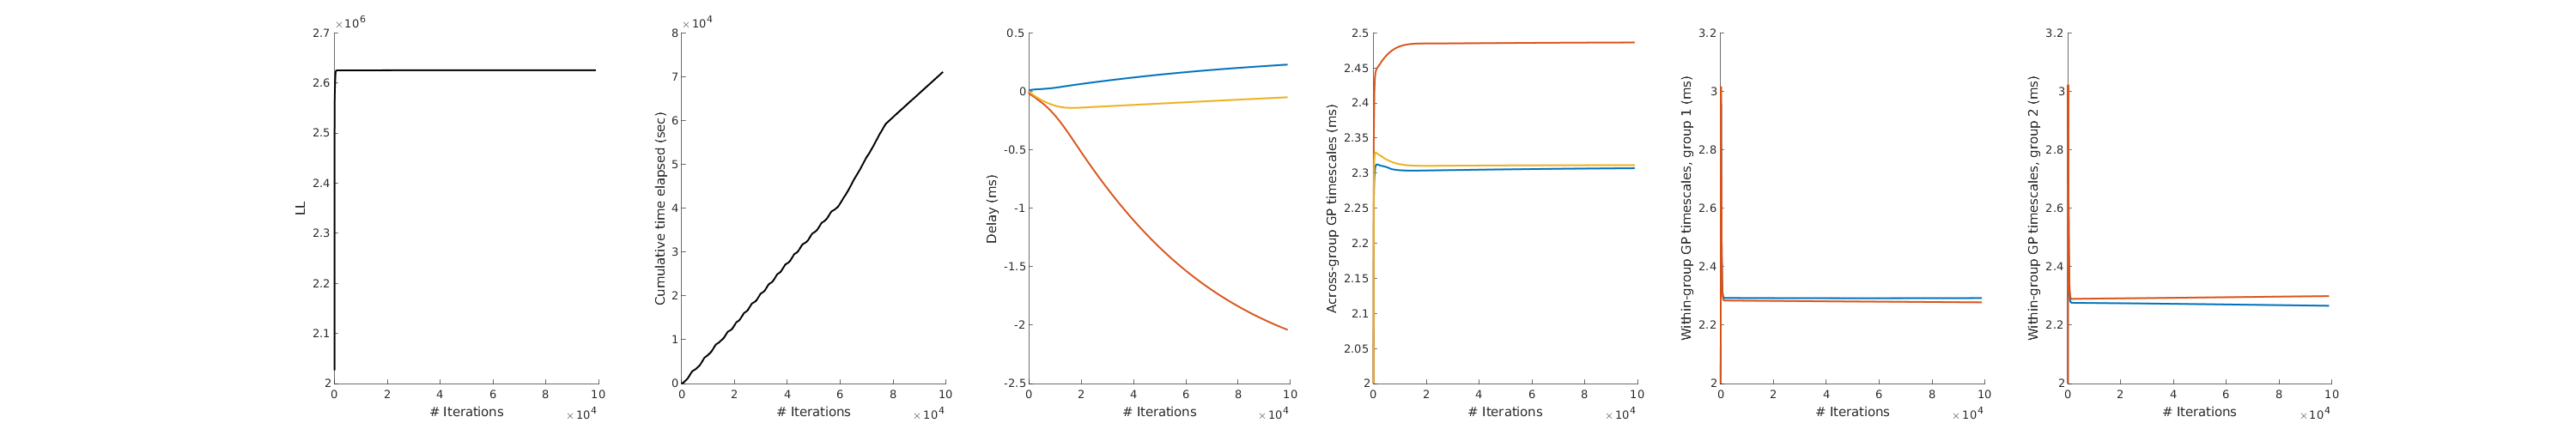

In [13]:
%plot -s 3000,500
% Plot training progress of various quantities. These plots can help with
% troubleshooting, if necessary.
plotFittingProgress(res, ...
                    'freqLL', freqLL, ...
                    'freqParam', freqParam, ...
                    'units', 'ms');

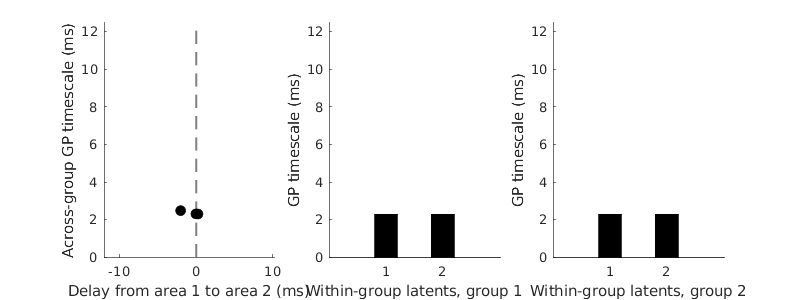

In [14]:
%plot -s 800,300
% Plot estimated and ground truth delays and across-group GP timescales
% together on the same plot. For these scatterplots, it's more
% straightforward to match ground truth latents to corresponding
% estimates.
plotGPparams_dlag(res.estParams, res.binWidth,...
                  res.rGroups, 'units', 'ms');

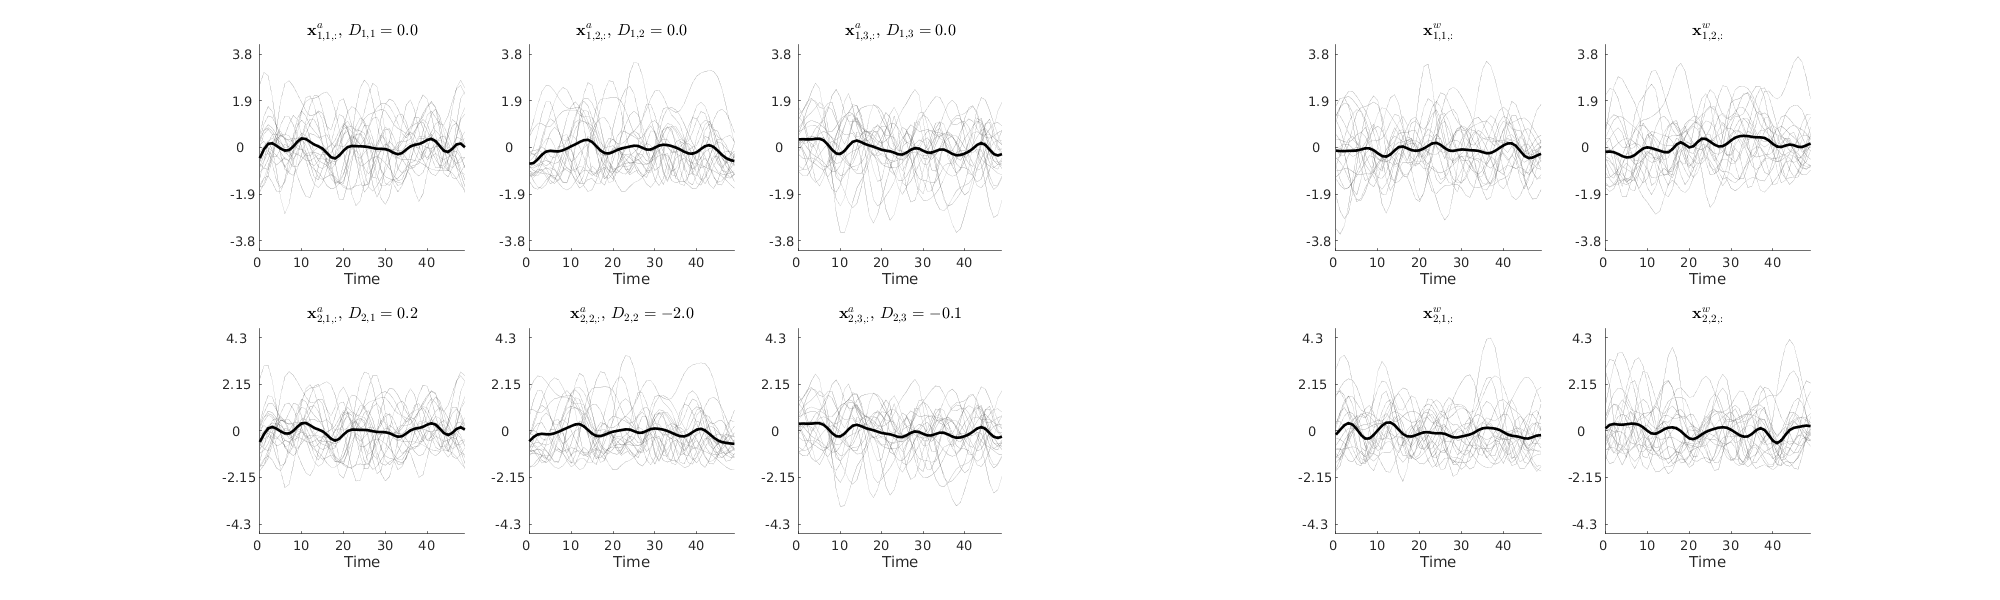

In [15]:
%plot -s 2000,600
% Plot estimated latents
[seqTrain, ~] = exactInferenceWithLL_dlag(data, res.estParams);
plotDimsVsTime_dlag(seqTrain, 'xsm', res.estParams, res.binWidth, ...
                  'nPlotMax', 20, ...
                  'plotSingle', true, ...
                  'plotMean', true, ...
                  'units', []);

In [16]:
groupSeq = partitionObs(seqTrain, xDim_total, 'datafield', 'xsm');

In [17]:
[latent_across_1, latent_within_1] = partitionLatents_meanOnly(groupSeq{1}, ...
    xDim_across, xDim_within(1), 'xpec', 'xsm');

In [18]:
[latent_across_2, latent_within_2] = partitionLatents_meanOnly(groupSeq{2}, ...
    xDim_across, xDim_within(2), 'xpec', 'xsm');

In [19]:
latent_across_1 = cat(3,latent_across_1.xsm);
latent_across_2 = cat(3,latent_across_2.xsm);

In [20]:
latent_across = cat(2, latent_across_1, latent_across_2);

In [21]:
latent_sigma = cellfun(@(x) cov(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 2]
    FontSize: 9
    Position: [0.9325 0.1100 0.0214 0.8150]
       Units: 'normalized'

  Use GET to show all properties



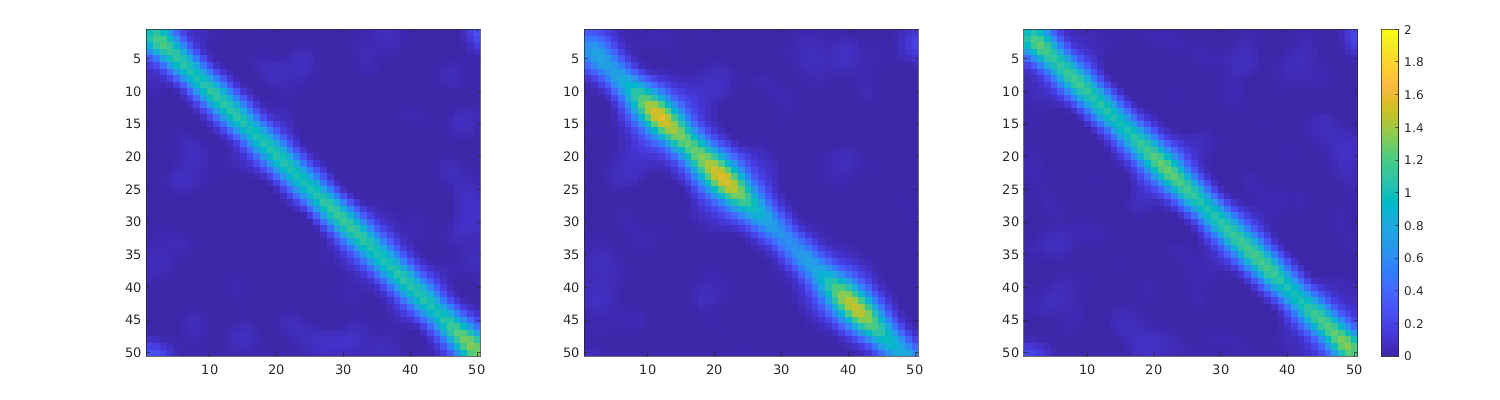

In [22]:
%plot -s 1500,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_sigma{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 2])
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [23]:
latent_rho = cellfun(@(x) corrcoef(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);

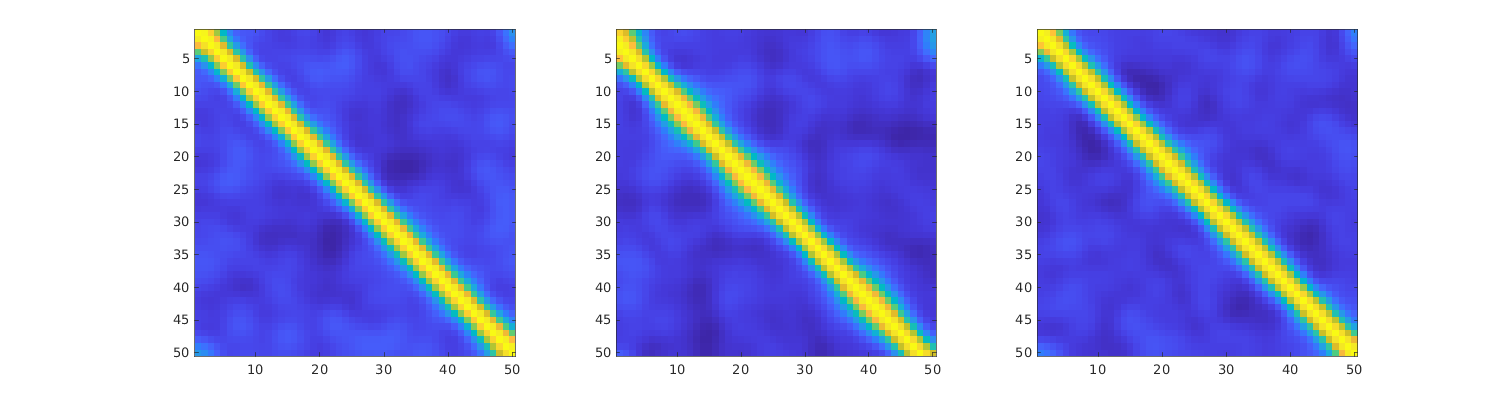

In [24]:
%plot -s 1500,400
for i = 1:3
    subplot(1,3,i)
    imagesc(latent_rho{i}(1:num_time,num_time+1:2*num_time))
end

In [25]:
groupParams = partitionParams_dlag(res.estParams);

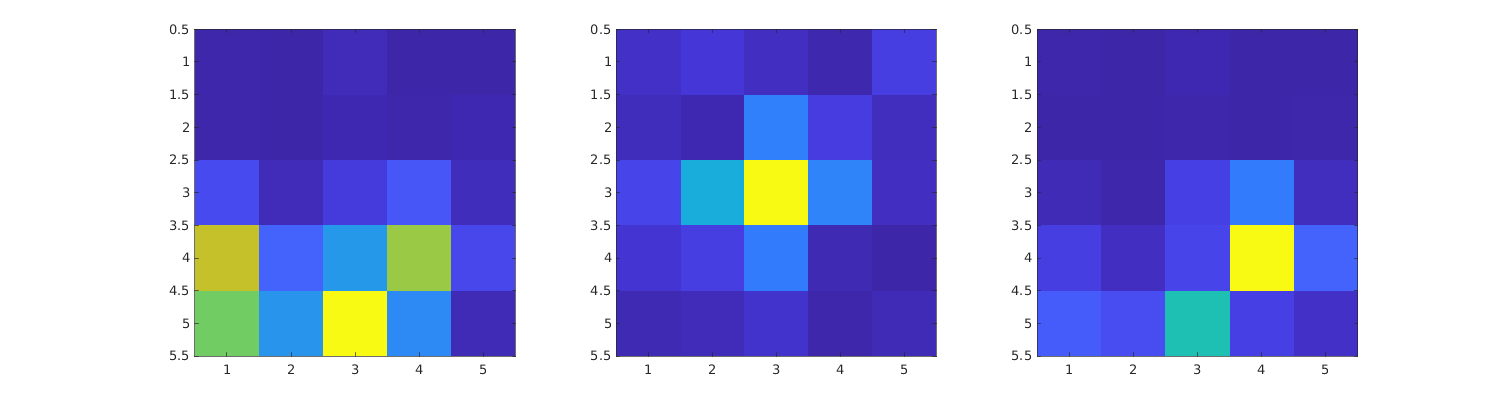

In [26]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{1}.C(:,i), 5, 5)))
end

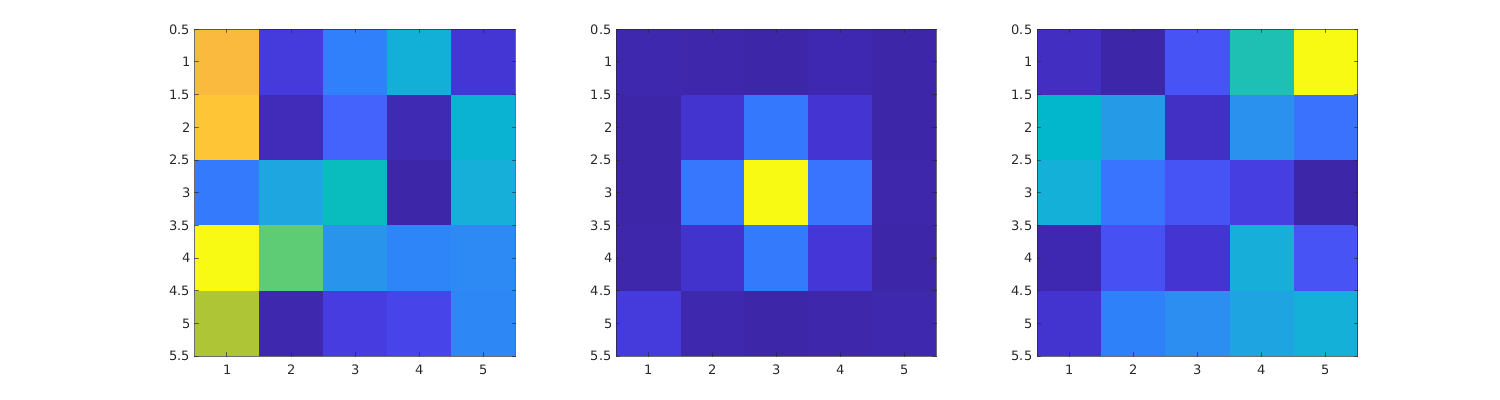

In [27]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{2}.C(:,i), 5, 5)))
end

## extended Fitting DLAG

In [29]:
res.estParams


ans = 

  struct with fields:

               d: [50x1 double]
               R: [50x50 double]
               C: [50x10 double]
     DelayMatrix: [2x3 double]
     xDim_across: 3
     xDim_within: [2 2]
           yDims: [25 25]
         covType: 'rbf'
    gamma_across: [0.1879 0.1618 0.1872]
    gamma_within: {[0.1903 0.1927]  [0.1947 0.1892]}
      eps_across: [1.0000e-03 1.0000e-03 1.0000e-03]
      eps_within: {[1.0000e-03 1.0000e-03]  [1.0000e-03 1.0000e-03]}
           notes: [1x1 struct]
        maxDelay: 25



In [ ]:
fit_dlag(6, data, ...
         'baseDir', baseDir, ...
         'method', method, ...
         'binWidth', binWidth, ...
         'numFolds', numFolds, ...
         'xDims_across', xDims_across, ...
         'xDims_within', xDims_within, ...
         'yDims', yDims, ...
         'rGroups', rGroups,...
         'startTau', startTau, ...
         'segLength', segLength, ...
         'init_method', 'params', ...
         'learnDelays', learnDelays, ...
         'maxIters', maxIters, ...
         'freqLL', freqLL, ...
         'freqParam', freqParam, ...
         'minVarFrac', minVarFrac, ...
         'parallelize', false, ... % Only relevant for cross-validation
         'verbose', verbose, ...
         'randomSeed', randomSeed, ...
         'overwriteExisting', overwriteExisting, ...
         'saveData', saveData, ...
         'initParams', res.estParams);


---------------------------------------
Making directory ./mat_results/run006...

===== Training on all data =====
Number of training trials: 1000
Number of test trials: 0
Across-group latent dimensionality: 3
Within-group latent dimensionalities: 2  2
Observation dimensionality: 50

Initializing DLAG using params...

Fitting DLAG model...


EM iteration 33076 of 500000        lik 2625334.934691       lik 2625334.936807       lik 2625334.938923       lik 2625334.941037       lik 2625334.943151       lik 2625334.945266       lik 2625334.947380       lik 2625334.949494       lik 2625334.951609       lik 2625334.953722       lik 2625334.955835       lik 2625334.957948       lik 2625334.960061       lik 2625334.962174       lik 2625334.964287       lik 2625334.966399       lik 2625334.968511       lik 2625334.970624       lik 2625334.972736       lik 2625334.974848       lik 2625334.976959       lik 2625334.979071       lik 2625334.981183       lik 2625334.983294       lik 2625334.985405       lik 2625334.987516       lik 2625334.989626       lik 2625334.991736       lik 2625334.993845       lik 2625334.995954       lik 2625334.998062       lik 2625335.000170       lik 2625335.002277       lik 2625335.004385       lik 2625335.006491       lik 2625335.008597       lik 2625335.010703       lik 2625335.012808       lik 2625335.01

## results

In [9]:
xDim_across = 3;
xDim_within = [2 2];
xDim_total = xDim_across + xDim_within;

In [10]:
% Retrieve the fitted model of interest
res = getModel_dlag(6, xDim_across, xDim_within, ...
                    'baseDir', baseDir);

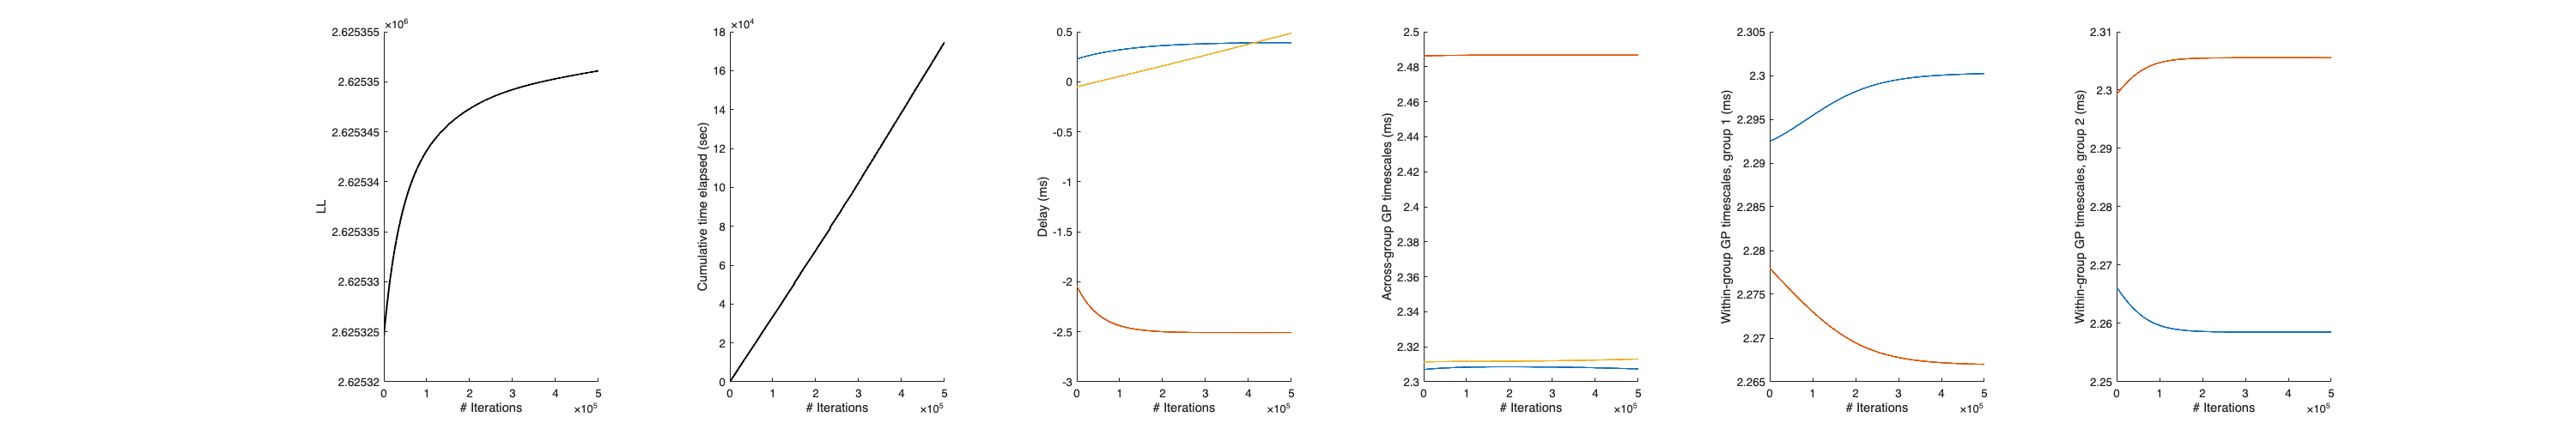

In [11]:
%plot -s 3000,500
% Plot training progress of various quantities. These plots can help with
% troubleshooting, if necessary.
plotFittingProgress(res, ...
                    'freqLL', freqLL, ...
                    'freqParam', freqParam, ...
                    'units', 'ms');

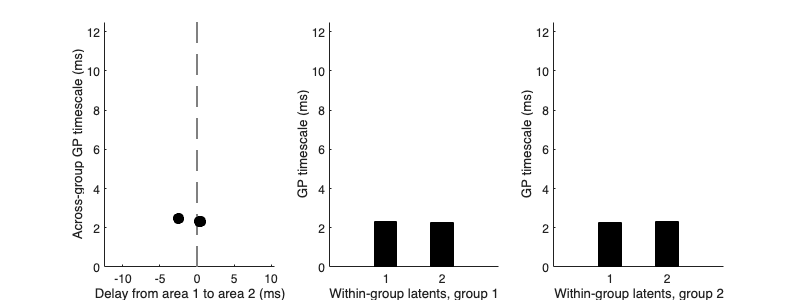

In [12]:
%plot -s 800,300
% Plot estimated and ground truth delays and across-group GP timescales
% together on the same plot. For these scatterplots, it's more
% straightforward to match ground truth latents to corresponding
% estimates.
plotGPparams_dlag(res.estParams, res.binWidth,...
                  res.rGroups, 'units', 'ms');

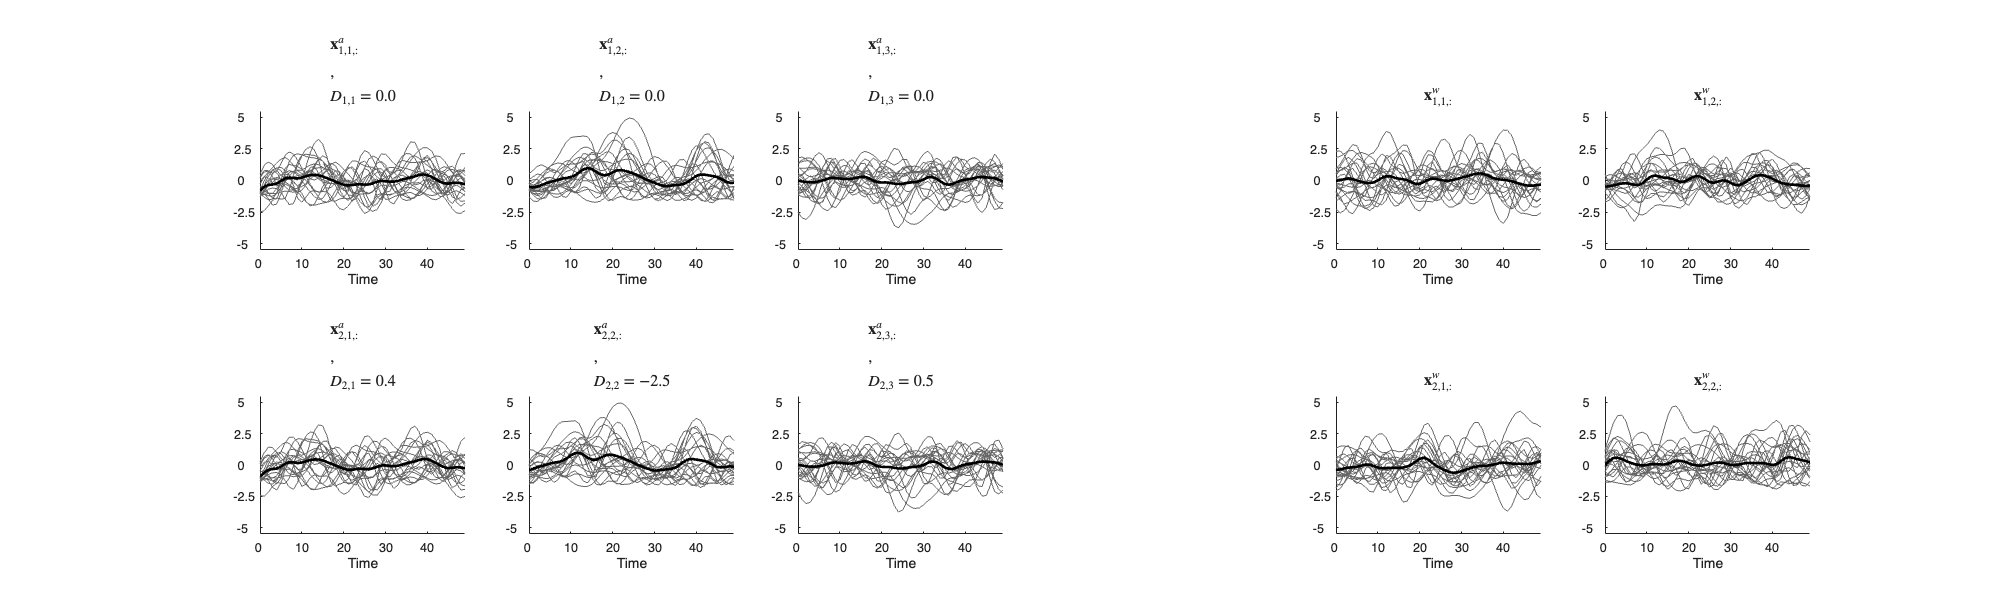

In [13]:
%plot -s 2000,600
% Plot estimated latents
[seqTrain, ~] = exactInferenceWithLL_dlag(data, res.estParams);
plotDimsVsTime_dlag(seqTrain, 'xsm', res.estParams, res.binWidth, ...
                  'nPlotMax', 20, ...
                  'plotSingle', true, ...
                  'plotMean', true, ...
                  'units', []);

In [14]:
groupSeq = partitionObs(seqTrain, xDim_total, 'datafield', 'xsm');

In [15]:
[latent_across_1, latent_within_1] = partitionLatents_meanOnly(groupSeq{1}, ...
    xDim_across, xDim_within(1), 'xpec', 'xsm');

In [16]:
[latent_across_2, latent_within_2] = partitionLatents_meanOnly(groupSeq{2}, ...
    xDim_across, xDim_within(2), 'xpec', 'xsm');

In [17]:
latent_across_1 = cat(3,latent_across_1.xsm);
latent_across_2 = cat(3,latent_across_2.xsm);

In [18]:
latent_across = cat(2, latent_across_1, latent_across_2);

In [19]:
latent_sigma = cellfun(@(x) cov(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 2]
    FontSize: 8.5500
    Position: [0.9268 0.3416 0.0164 0.3518]
       Units: 'normalized'

  Use GET to show all properties



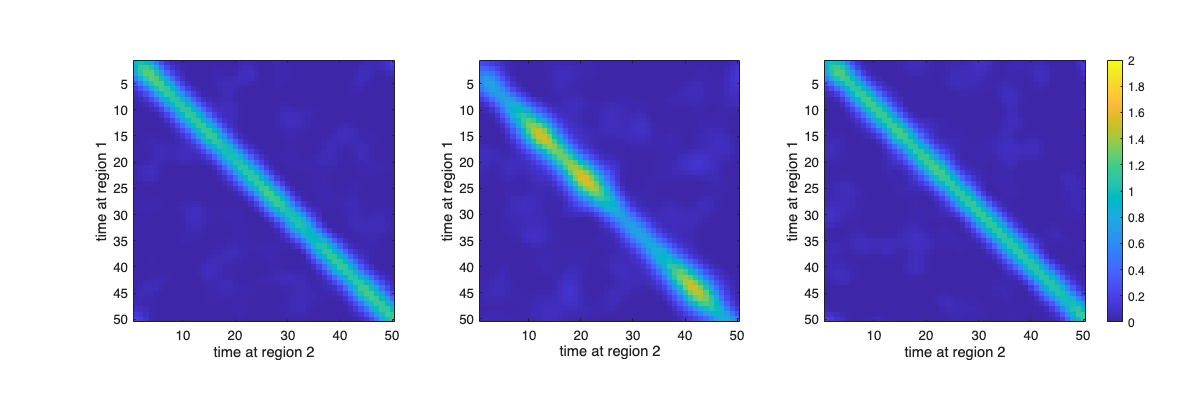

In [20]:
%plot -s 1200,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_sigma{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 2])
    axis square
    xlabel('time at region 2')
    ylabel('time at region 1')
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [21]:
latent_rho = cellfun(@(x) corrcoef(squeeze(x)'), ...
    num2cell(latent_across, [2 3]), 'UniformOutput', false);


cb = 

  ColorBar with properties:

    Location: 'layout'
      Limits: [0 1]
    FontSize: 8.5500
    Position: [0.9268 0.1100 0.0164 0.8150]
       Units: 'normalized'

  Use GET to show all properties



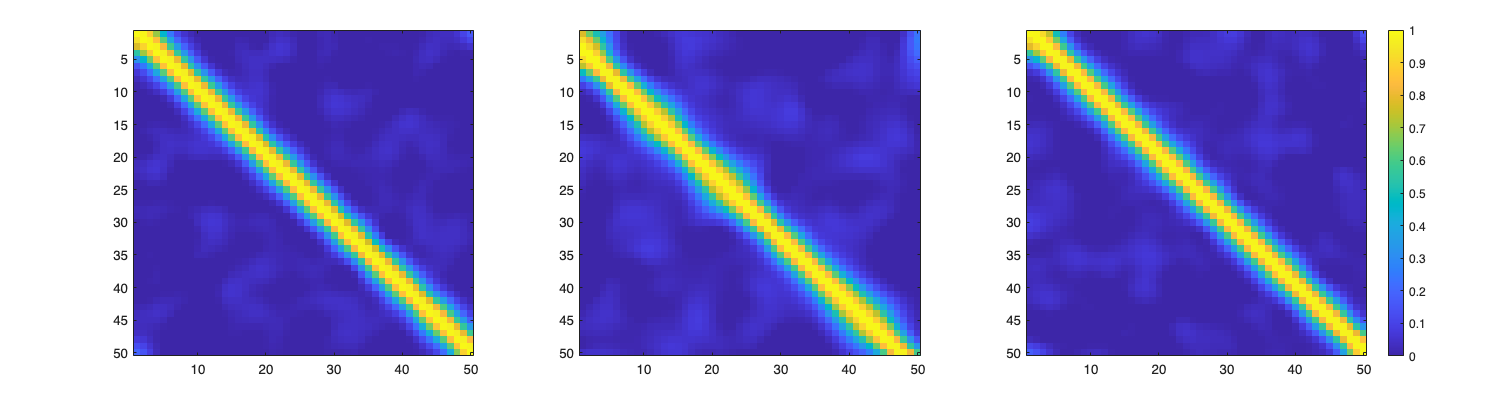

In [22]:
%plot -s 1500,400
tcl = tiledlayout(1,3);
for i = 1:3
    nexttile()
    imagesc(latent_rho{i}(1:num_time,num_time+1:2*num_time))
    caxis([0 1])
end
cb = colorbar(); 
cb.Layout.Tile = 'east'

In [23]:
groupParams = partitionParams_dlag(res.estParams);

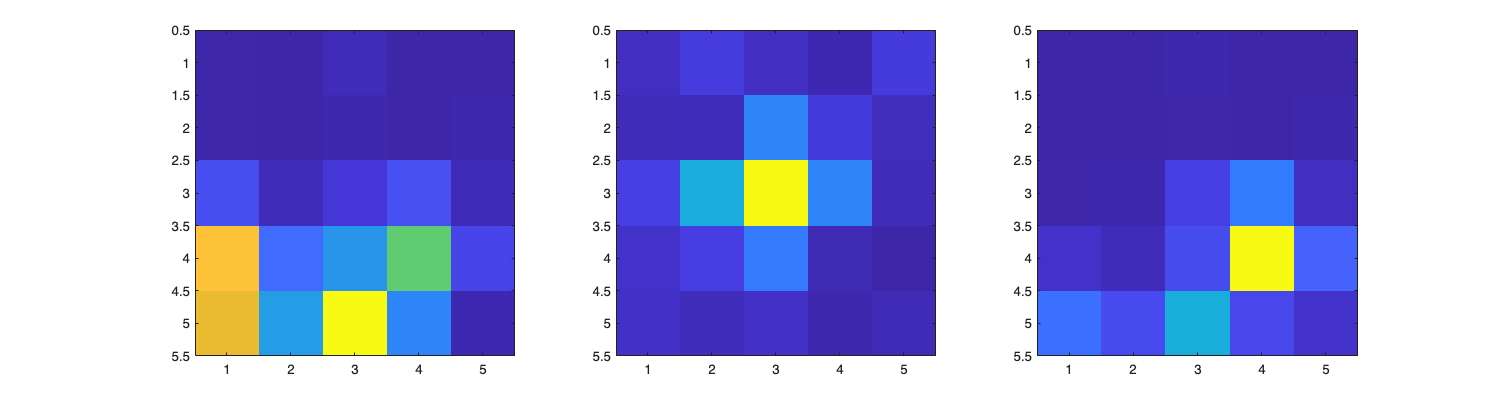

In [24]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{1}.C(:,i), 5, 5)))
end

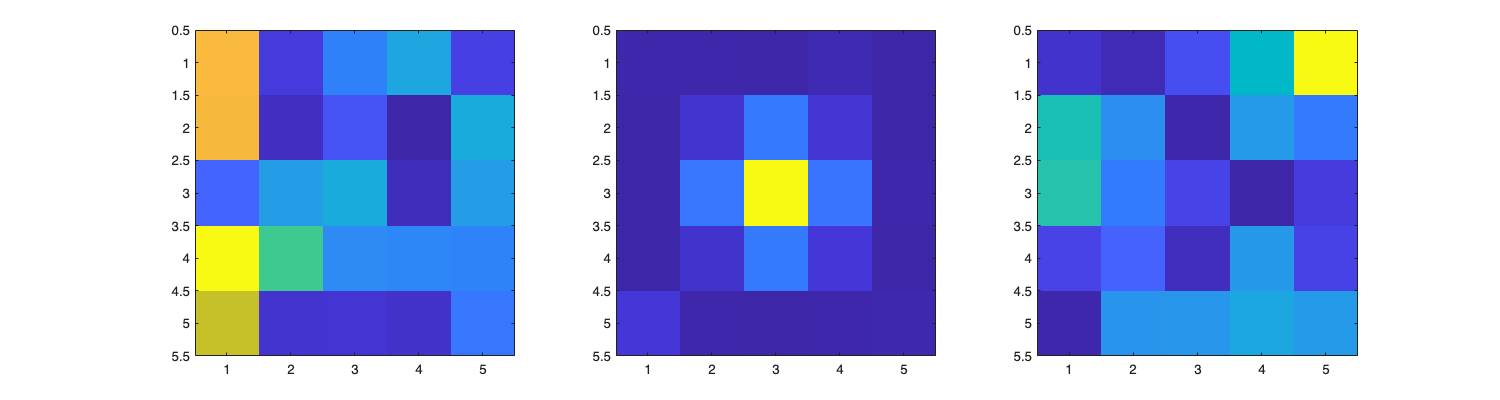

In [25]:
%plot -s 1500,400
for i = 1:xDim_across
    subplot(1,3,i)
    imagesc(abs(reshape(groupParams{2}.C(:,i), 5, 5)))
end

In [26]:
latent_sigma


latent_sigma =

  3×1 cell array

    {100×100 double}
    {100×100 double}
    {100×100 double}



In [27]:
Sigma_DLAG = latent_sigma;
latent_DLAG = latent_across;
C_0 = groupParams{1}.C(:,1:3);
C_1 = groupParams{2}.C(:,1:3);
save(sprintf('%s/result_simulation_11_DLAG.mat', data_dir), 'Sigma_DLAG', 'latent_DLAG', 'C_0', 'C_1')